# Mithali S
Exploratory Data Analysis on Retail dataset

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn import datasets
import seaborn as sns
%matplotlib inline

# Loading the data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Getting to known the data and finding irregularity in the data

In [4]:
len(df)

9994

In [5]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
df.shape

(9994, 13)

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [10]:
df.drop('Postal Code',axis='columns',inplace=True)
df.drop('Country',axis='columns',inplace=True)

Since USA is the only country in this data set and the postal address does not matter when it comes to profit or sales so we drop the colunms  

# Find in the relationships between the attibutes using correlation matrix and heatmap

In [11]:
corr_matrix=df.corr()
corr_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


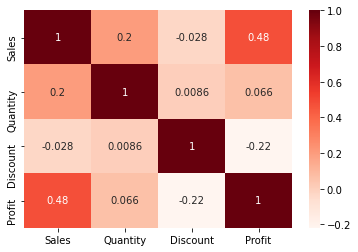

In [12]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

We can see sales and profit are posively and highly related 


In [13]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

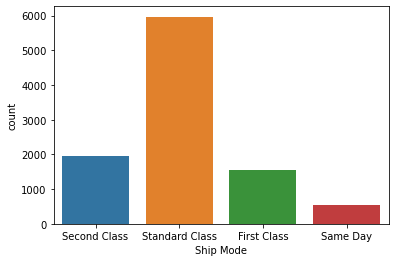

In [14]:
sns.countplot(x=df['Ship Mode'])

The majority of shipping is done in standard class mode

In [15]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

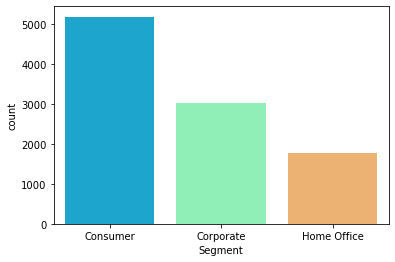

In [16]:
sns.countplot(x = 'Segment',data = df, palette = 'rainbow')

consumers have the max purchases 

In [17]:
len(df['State'].unique())

49

There are over 49 states in the US whoes order this store gets

In [18]:
len(df['City'].unique())

531

There are over 531 cities US whoes order this store gets

In [19]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [20]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

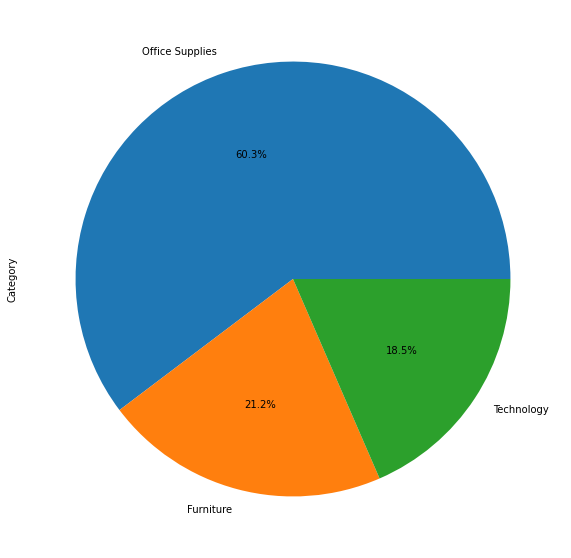

In [21]:
plt.figure(figsize=(10,10))
df['Category'].value_counts().plot.pie(autopct="%1.1f%%")

In [22]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

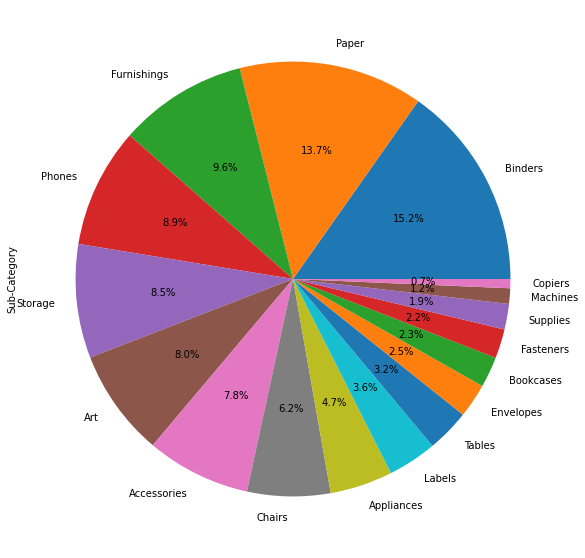

In [23]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

Text(0.5, 1.0, 'sales per category with its subcategory')

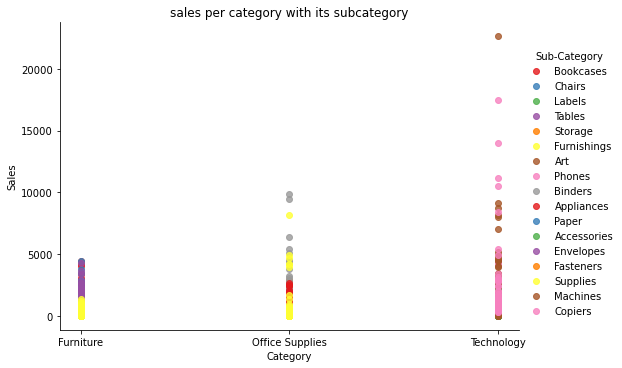

In [24]:
sns.lmplot(x='Category',y='Sales',data=df,fit_reg=False ,hue='Sub-Category',legend=True ,palette="Set1",aspect=15/10)
plt.title("sales per category with its subcategory")

C:\Users\Mithali S\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'sales per category with its subcategory')

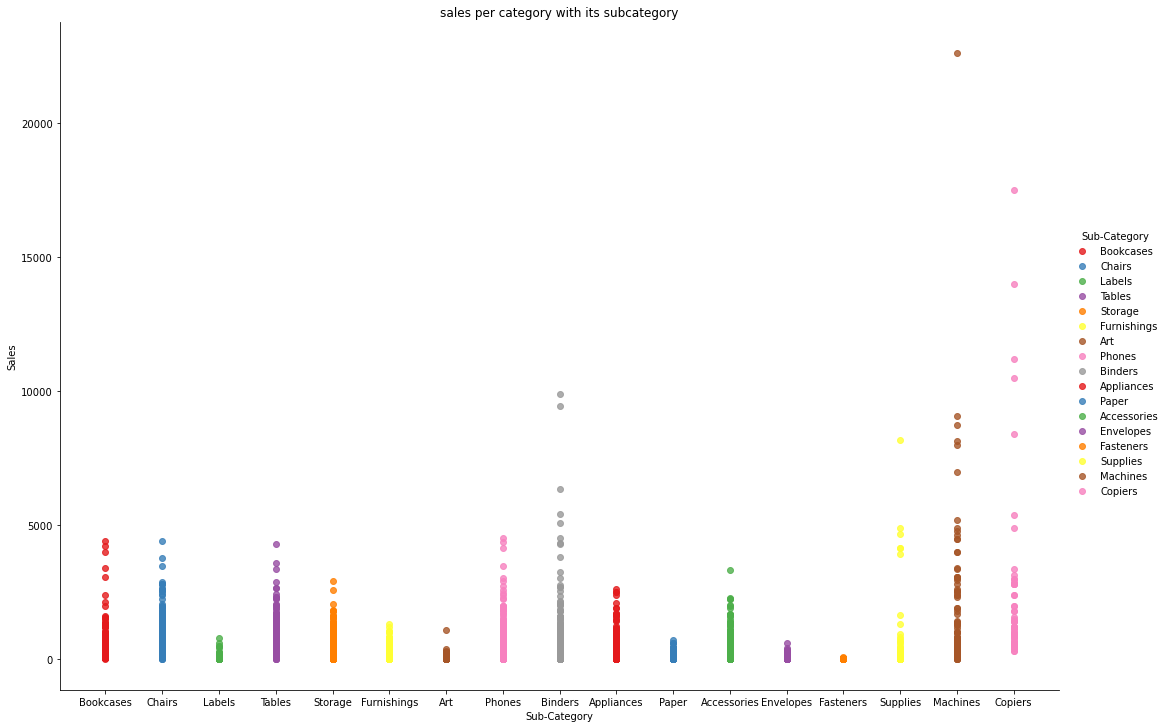

In [25]:
sns.lmplot(x='Sub-Category',y='Sales',data=df,fit_reg=False ,hue='Sub-Category',legend=True ,palette="Set1",aspect=15/10,size=10)
plt.title("sales per category with its subcategory")

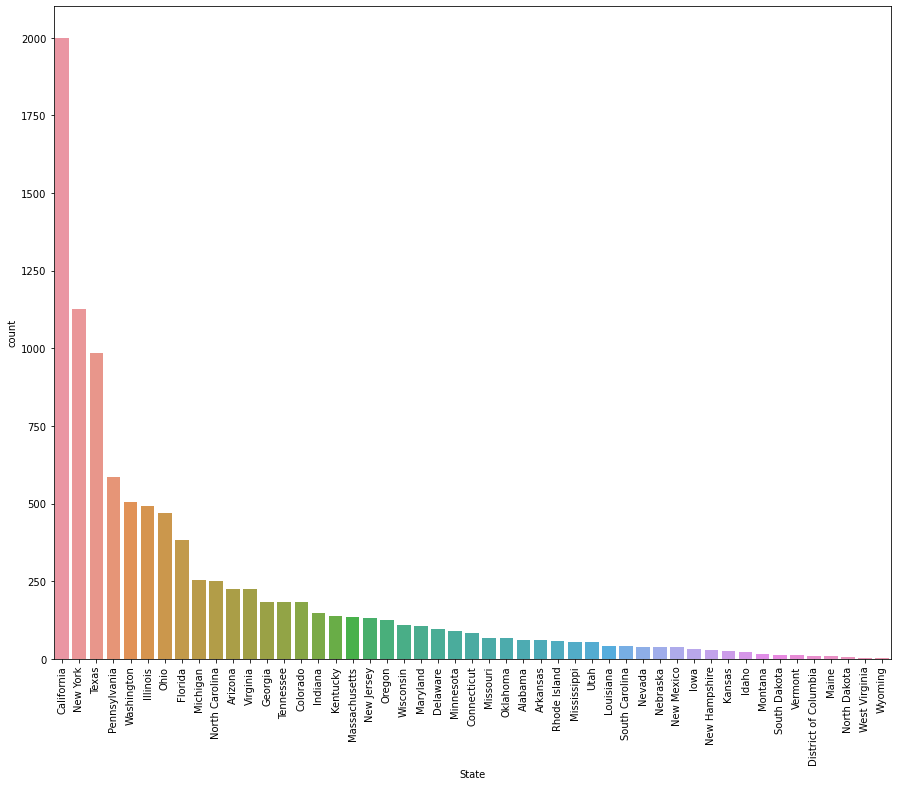

In [26]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

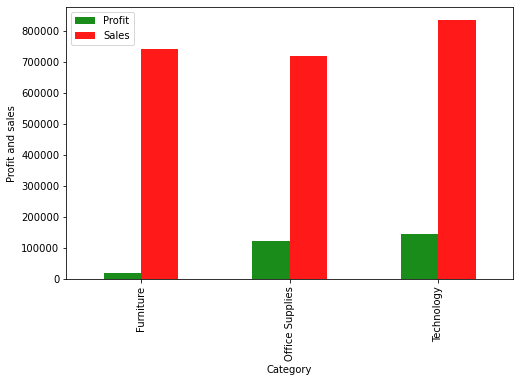

In [27]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['green','red'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit and sales')
plt.show()

These are the few analysis I hv done on this data set